In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv("health_risk_classification.csv")
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bmi_score                 1000 non-null   float64
 1   blood_pressure_variation  1000 non-null   float64
 2   activity_level_index      1000 non-null   float64
 3   high_risk_flag            1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [146]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


<Axes: xlabel='blood_pressure_variation', ylabel='activity_level_index'>

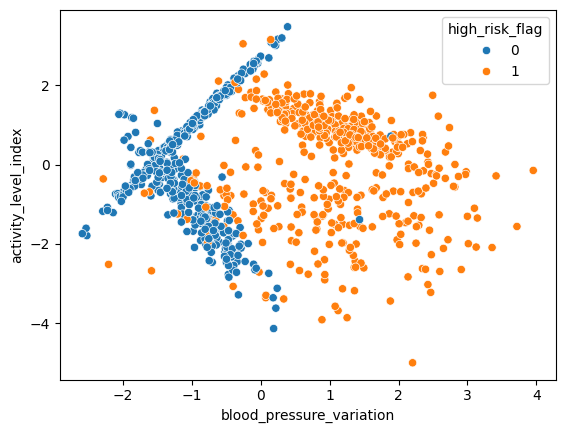

In [147]:
sns.scatterplot(x=df["blood_pressure_variation"], y=df["activity_level_index"], hue=df["high_risk_flag"])

In [148]:
df.corr()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
bmi_score,1.000000,-0.557004,0.833407,-0.413164
blood_pressure_variation,-0.557004,1.000000,-0.005222,0.786860
activity_level_index,0.833407,-0.005222,1.000000,0.026137
high_risk_flag,-0.413164,0.786860,0.026137,1.000000


Veriye bakınca tansiyondaki dalgalanma arttıkça riskin arttığını yorumlayabiliriz.

In [149]:
df["high_risk_flag"].value_counts()

,count
high_risk_flag,
0,502
1,498


Datanın balanced olduğunu gözlemledik

In [150]:
X = df.drop("high_risk_flag", axis=1)
y = df["high_risk_flag"]

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

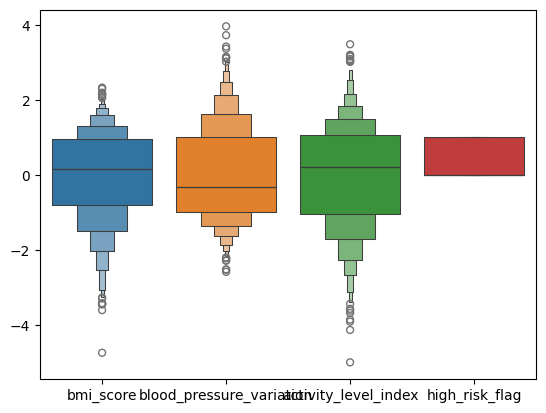

In [152]:
sns.boxenplot(df)
plt.show()

Scale edilmiş bir data olduğu için scaler kullanmasak da olur fakat notlarımızın içinde bulunması açısından kullanalım.

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, algorithm="auto", weights="uniform")
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [155]:
y_pred = classifier.predict(X_test_scaled)

In [156]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("confusion_matrix:\n", confusion_matrix(y_pred, y_test))
print("accuracy_score: ", accuracy_score(y_pred, y_test))
print("classification_report:\n", classification_report(y_pred, y_test))

confusion_matrix:
 [[125   9]
 [  1 115]]
accuracy_score:  0.96
classification_report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       134
           1       0.93      0.99      0.96       116

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

